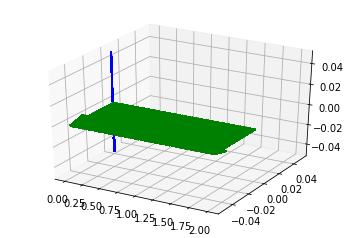

In [2]:
import numpy as np
import quaternion
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import os

pprz_home = os.environ['PAPARAZZI_HOME']
vrep_home = os.environ['VREP_ROOT']

pprz = np.loadtxt(open(pprz_home+"/log.csv", "r"), delimiter=",", skiprows=1)
vrep = np.loadtxt(open(vrep_home+"/log.csv", "r"), delimiter=",", skiprows=1)

pprzVec = quaternion.as_rotation_vector(quaternion.as_quat_array(pprz[:,-4:]))
vrepVec = quaternion.as_rotation_vector(quaternion.as_quat_array(vrep[:,-4:]))
pprzTime = pprz[:,0]
vrepTime = vrep[:,0]

outputSize = 100#len(rVec)

fig = plt.figure()
ax = fig.gca(projection='3d')

pprzX, pprzY, pprzZ = np.meshgrid(pprzTime[:outputSize].transpose(),
                      np.arange(1),
                      np.arange(1))
ax.quiver(pprzX, pprzY, pprzZ, 
          pprzVec[:outputSize,0], pprzVec[:outputSize,1], pprzVec[:outputSize,2],
          length=0.05, normalize=True, color='blue')

vrepX, vrepY, vrepZ = np.meshgrid(vrepTime[:outputSize].transpose(),
                      np.arange(1),
                      np.arange(1))
ax.quiver(vrepX, vrepY,  vrepZ, 
          vrepVec[:outputSize,0], vrepVec[:outputSize,1], vrepVec[:outputSize,2],
          length=0.05, normalize=True, color='green')
plt.show()